In [1]:
import numpy as np
import pandas as pd 

import missingno as mis

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
data = pd.read_csv("marketing_sample_for_naukri_com-jobs__20190701_20190830__30k_data.csv")
data.head(2)


,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,Qualifications
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,$59K-$99K,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager,M.Tech
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,$56K-$116K,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer,BCA


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Uniq Id                  30000 non-null  object
 1   Crawl Timestamp          30000 non-null  object
 2   Job Title                29425 non-null  object
 3   Job Salary               30000 non-null  object
 4   Job Experience Required  30000 non-null  object
 5   Key Skills               28729 non-null  object
 6   Role Category            27695 non-null  object
 7   Location                 29423 non-null  object
 8   Functional Area          29427 non-null  object
 9   Industry                 29427 non-null  object
 10  Role                     29099 non-null  object
 11  Qualifications           30000 non-null  object
dtypes: object(12)
memory usage: 2.7+ MB


In [4]:
data.describe()


,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,Qualifications
count,30000,30000,29425,30000,30000,28729,27695,29423,29427,29427,29099,30000
unique,30000,28865,23884,561,246,26909,206,2573,72,122,649,10
top,2b2ece7ba268973772dbcd2cb1ae9239,2019-08-04 02:01:21 +0000,Business Development Executive,$57K-$82K,2 - 5 yrs,Counselor| Mentor| Trainer| Advisor| Teaching,Programming & Design,Bengaluru,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Software Developer,B.Tech
freq,1,5,120,78,2084,102,8551,4986,7400,10012,6396,3151


<Axes: >

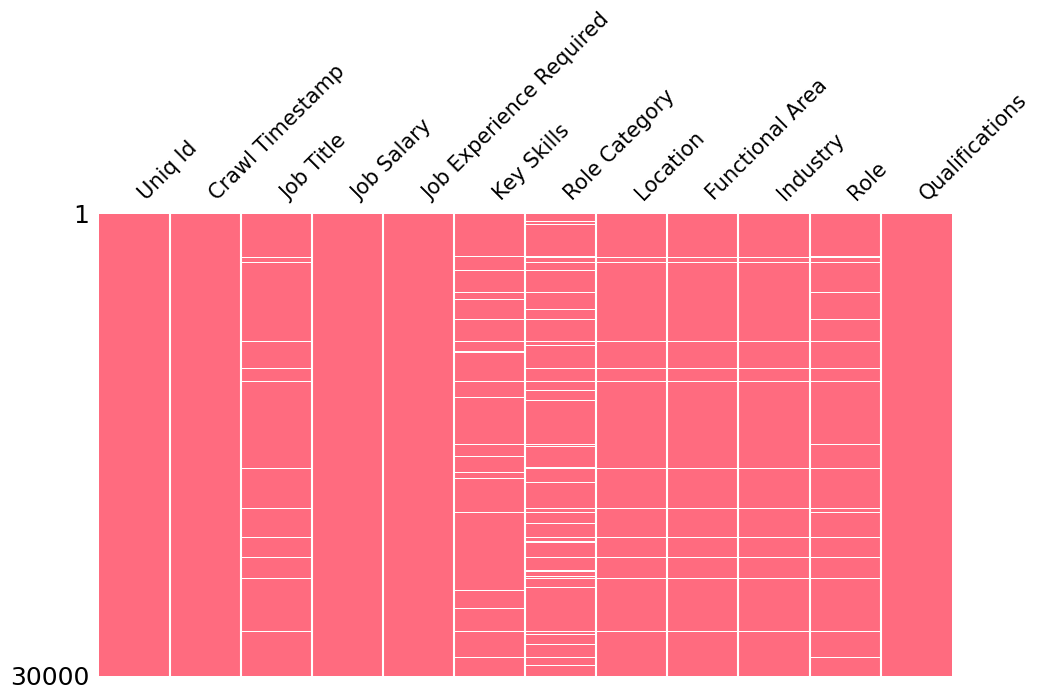

In [5]:
mis.matrix(data, figsize=(11,6), fontsize=15, color=(1, 0.42, 0.5), sparkline=False)


In [6]:
data = data.dropna()


In [7]:
duplicate_count = data.duplicated(subset='Uniq Id').sum()
print(f"Total duplicates: {duplicate_count}")


Total duplicates: 0


In [8]:

data[['Min Salary', 'Max Salary']] = data['Job Salary'].str.extract(r'\$?(\d+)[kK]-\$?(\d+)[kK]')

data['Min Salary'] = pd.to_numeric(data['Min Salary']) * 1000
data['Max Salary'] = pd.to_numeric(data['Max Salary']) * 1000

data['Average Salary'] = (data['Min Salary'] + data['Max Salary']) / 2

data['Average Salary'] = data['Average Salary'].astype(int)



In [9]:
data["Job Title"].value_counts()


Job Title
Sales Executive                                    118
PHP Developer                                      117
Business Development Executive                     116
Business Development Manager                        97
Graphic Designer                                    77
                                                  ... 
Business Development / Corporate Sales               1
Business Development Manager (BDM)                   1
Supply Chain - Import Export Executive               1
Back End Java Developer - Restful Services/soap      1
AGM - Purchase Automobiles                           1
Name: count, Length: 21849, dtype: int64

In [10]:
data["Qualifications"].unique()


array(['M.Tech', 'BCA', 'PhD', 'MBA', 'MCA', 'M.Com', 'BBA', 'B.Tech',
       'B.Com', 'BA'], dtype=object)

In [11]:
data["Job Experience Required"].unique()


array(['5 - 10 yrs', '2 - 5 yrs', '0 - 1 yrs', '0 - 5 yrs', '5 - 7 yrs',
       '0 - 0 yrs', '9 - 14 yrs', '2 - 7 yrs', '1 - 5 yrs', '1 - 6 yrs',
       '3 - 7 Years', '2 - 4 yrs', '3 - 7 yrs', '0 - 3 yrs', '0 - 4 yrs',
       '6 - 8 yrs', '4 - 9 yrs', '3 - 5 yrs', '7 - 12 yrs', '8 - 10 yrs',
       '2 - 3 yrs', '15 - 20 yrs', '10 - 16 yrs', '2 - 7 Years',
       '1 - 4 yrs', '3 - 6 yrs', '5 - 8 yrs', '8 - 13 yrs', '3 - 8 yrs',
       '6 - 10 yrs', '1 - 2 yrs', '6 - 11 yrs', '1 - 3 yrs', '4 - 7 yrs',
       '2 - 6 yrs', '8 - 12 yrs', '15 - 22 yrs', '1 - 3 Years',
       '4 - 8 yrs', '0 - 2 yrs', '5 - 7 Years', '10 - 15 yrs',
       '4 - 5 yrs', '5 - 10 Years', '10 - 14 yrs', '4 - 6 yrs',
       '2 - 4 Years', '4 - 9 Years', '6 - 7 yrs', '13 - 15 Years',
       '2 - 5 Years', '10 - 20 yrs', '3 - 4 yrs', '12 - 18 yrs',
       '6 - 11 Years', '0 - 2 Years', '4 - 7 Years', '10 - 17 yrs',
       '7 - 10 yrs', '10 - 12 yrs', '5 - 9 yrs', '3 - 8 Years',
       '6 - 9 yrs', '12 - 15 yrs', '12 

In [12]:
data['Job Experience Required'] = data['Job Experience Required'].str.replace('Years', 'yrs', regex=False)

def calculate_average_experience(experience):
    if isinstance(experience, str):
        experience = experience.strip().lower()
    else:
        return np.nan
    
    if " - " in experience:
        range_parts = experience.split(" - ")
        min_exp = int(''.join(filter(str.isdigit, range_parts[0]))) if range_parts[0] else np.nan
        max_exp = int(''.join(filter(str.isdigit, range_parts[1]))) if range_parts[1] else np.nan
        return np.nanmean([min_exp, max_exp])
    elif "years" in experience or "yrs" in experience:
        return int(''.join(filter(str.isdigit, experience))) if experience else np.nan
    else:
        return np.nan

Average_Experience = data['Job Experience Required'].apply(calculate_average_experience)


In [13]:

def categorize_experience(avg_experience):
    if avg_experience <= 1:
        return 'Fresher'
    elif avg_experience <= 5:
        return 'Junior/Mid-level'
    elif avg_experience <= 10:
        return 'Experienced'
    elif avg_experience <= 20:
        return 'Senior'
    else:
        return 'Most Senior'

data['Experience Category'] = Average_Experience.apply(categorize_experience)


In [14]:
data.drop(columns=['Min Salary', 'Max Salary', 'Job Salary', 'Job Experience Required', 'Crawl Timestamp','Uniq Id'], inplace=True)


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27005 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Job Title            27005 non-null  object
 1   Key Skills           27005 non-null  object
 2   Role Category        27005 non-null  object
 3   Location             27005 non-null  object
 4   Functional Area      27005 non-null  object
 5   Industry             27005 non-null  object
 6   Role                 27005 non-null  object
 7   Qualifications       27005 non-null  object
 8   Average Salary       27005 non-null  int64 
 9   Experience Category  27005 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.3+ MB


In [17]:
data.to_csv("modified_jobs.csv", index=False)

print("Modified file saved successfully!")


Modified file saved successfully!
